Clustering for the Univerrsity data to obtain optimum number of clusters.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('/content/University_Clustering.xlsx')

In [4]:
data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [28]:
data.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
clust       0
dtype: int64

In [6]:
data = data.drop(['State'],axis=1)

In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:, 1:])
data_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# For creating dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [10]:
z=linkage(data_norm, method='complete',metric='euclidean')

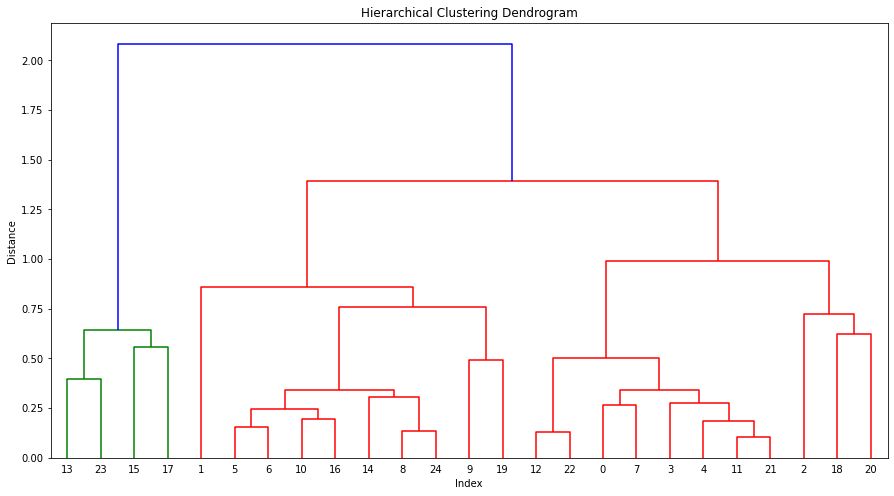

In [17]:
 # Dendrogram
plt.figure(figsize = (15,8));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [20]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(data_norm)

In [21]:
h_complete.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2])

In [22]:
cluster_labels=pd.Series(h_complete.labels_)

In [23]:
data['clust']=cluster_labels

In [24]:
data1 = data.iloc[:, [7,0,1,2,3,4,5,6]]


In [25]:
data1.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [26]:

data1.iloc[:, 2:].groupby(data1.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


Applying K-Means Clustering to universiity dataset

In [31]:
from sklearn.cluster import KMeans

In [33]:
TWSS=[]
k= list(range(2,9))

In [37]:
for i in k:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data_norm)
  TWSS.append(kmeans.inertia_)

In [38]:
TWSS

[4.12345244239718,
 2.955684328573544,
 2.24094486741605,
 1.7196037808194464,
 1.4320118047058645,
 1.2337402672400788,
 1.051229310979934]

Text(0, 0.5, 'total_within_ss')

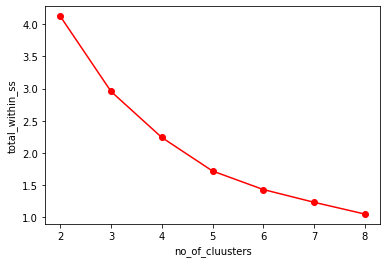

In [39]:
plt.plot(k,TWSS, '-ro');plt.xlabel('no_of_cluusters');plt.ylabel('total_within_ss')

In [43]:
model=KMeans(n_clusters=3)
model.fit(data_norm)

KMeans(n_clusters=3)

In [44]:
model.labels_

array([2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [45]:
mb=pd.Series(model.labels_)

In [46]:
data['kClust']=mb

In [47]:
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust,kClust
0,Brown,1310,89,22,13,22704,94,0,2
1,CalTech,1415,100,25,6,63575,81,2,2
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,0,2
4,Cornell,1280,83,33,13,21864,90,0,0


In [48]:

data.iloc[:, 2:8].groupby(data.kClust).mean()

,Top10,Accept,SFRatio,Expenses,GradRate,clust
kClust,,,,,,
0,77.700000,43.500000,12.900000,22008.200000,86.90,0.200000
1,38.750000,70.000000,19.250000,9953.000000,71.75,1.000000
2,89.090909,24.090909,10.181818,38618.727273,92.00,1.636364
